In [10]:
# Importing necessary imports
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
sns.set()

In [11]:
#!pip install lux

In [12]:
#import lux

In [16]:
df = pd.read_csv('kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
df.shape

(400, 26)

In [6]:
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [7]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [8]:
# duplicates - cleaning part
df.duplicated().sum()

0

In [9]:
# missing value checks
df.isnull().sum().sum()

1009

In [10]:
df.isnull().sum()/len(df)*100

id                 0.00
age                2.25
bp                 3.00
sg                11.75
al                11.50
su                12.25
rbc               38.00
pc                16.25
pcc                1.00
ba                 1.00
bgr               11.00
bu                 4.75
sc                 4.25
sod               21.75
pot               22.00
hemo              13.00
pcv               17.50
wc                26.25
rc                32.50
htn                0.50
dm                 0.50
cad                0.50
appet              0.25
pe                 0.25
ane                0.25
classification     0.00
dtype: float64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [74]:
# Finding the unique values in the given columns

for i in df.columns:
    print("************************************", i ,  "****************************")
    print()
    print(set(df[i].tolist()))
    print()

************************************ id ****************************

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207,

In [70]:
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [ ]:
{'50', '40', '30', '47', '53', '51', '24', '28', '27', '26', '33', '14', '42', '19', '9', '46', 
 '49', '54', '31', nan, '45', '15', '34', '48', '25', '29', '20', '22', '\t?', '52', '37', '35', 
 '21', '36', '38', '16', '18', '43', '23', '44', '41', '17', '32', '\t43', '39'}


In [64]:
df['pcv'] = df['pcv'].apply(lambda x:'43' if x=='\t43' else x)
df['pcv'] = df['pcv'].apply(lambda x:'41' if x=='\t?' else x)

In [56]:
df['wc'] = df['wc'].apply(lambda x:'6200' if x=='\t6200' else x)
df['wc'] = df['wc'].apply(lambda x:'8400' if x=='\t8400' else x)
df['wc'] = df['wc'].apply(lambda x:'9800' if x=='\t?' else x)

In [62]:
df['pcv'].mode()[0]

'41'

In [50]:
df['rc'] = df['rc'].apply(lambda x:'5.2' if x=='\t?' else x)

In [36]:
df['classification'] = df['classification'].apply(lambda x:'ckd' if x=='ckd\t' else x)

In [40]:
df['cad'] = df['cad'].apply(lambda x:'no' if x=='\tno' else x)

In [44]:
df['dm'] = df['dm'].apply(lambda x:'yes' if x=='\tyes' else x)
df['dm'] = df['dm'].apply(lambda x:'no' if x=='\tno' else x)
df['dm'] = df['dm'].apply(lambda x:'yes' if x==' yes' else x)

In [78]:
for i in df.select_dtypes(exclude=["object"]).columns:
    df[i]=df[i].apply(lambda x:float(x))

In [90]:
# Finding the unique values in the given columns

for i in df.columns:
    print("************************************", i ,  "****************************")
    print()
    print(set(df[i].tolist()))
    print()

************************************ id ****************************

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148

In [82]:
df.dtypes

id                float64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [84]:
print(df['pcv'].mode()[0])
print()
print(df['wc'].mode()[0])
print()
print(df['rc'].mode()[0])

41

9800

5.2


In [86]:
df['pcv'] = df['pcv'].fillna(df['pcv'].mode()[0])
df['wc'] = df['wc'].fillna(df['wc'].mode()[0])
df['rc'] = df['rc'].fillna(df['rc'].mode()[0])

In [88]:
df['pcv'] = df['pcv'].astype('int64')
df['wc'] = df['wc'].astype('int64')
df['rc'] = df['rc'].astype('float64')

In [92]:
object_columns = df.select_dtypes(include=['object']).columns
print("Object type Columns :")
print(object_columns)


numerical_columns = df.select_dtypes(include=['int64','float64']).columns
print("\nNumerical type Columns :")
print(numerical_columns)

Object type Columns :
Index(['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
       'classification'],
      dtype='object')

Numerical type Columns :
Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot',
       'hemo', 'pcv', 'wc', 'rc'],
      dtype='object')


In [ ]:
#pcv               17.50
#wc                26.25
#rc                32.50

In [98]:
from sklearn.impute import SimpleImputer
imp_mode1 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_mode2 = SimpleImputer(missing_values=np.nan, strategy='median')
df_imp1 = pd.DataFrame(imp_mode1.fit_transform(df[object_columns]))
df_imp1.columns = df[object_columns].columns
df_imp2 = pd.DataFrame(imp_mode2.fit_transform(df[numerical_columns]))
df_imp2.columns = df[numerical_columns].columns

In [96]:
df[object_columns].columns

Index(['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
       'classification'],
      dtype='object')

In [102]:
print(df_imp1.isnull().sum().sum())
print()
print(df_imp2.isnull().sum().sum())

0

0


In [104]:
df_imp1

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...
395,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
396,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
397,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
398,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd


In [106]:
df_imp2

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,0.0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2
1,1.0,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,5.2
2,2.0,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,5.2
3,3.0,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9
4,4.0,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395.0,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9
396,396.0,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2
397,397.0,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4
398,398.0,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9


In [116]:
df_imp1

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...
395,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
396,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
397,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
398,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd


In [108]:
df_imp2 = df_imp2.iloc[:,1:]
df_imp2

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2
1,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,5.2
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,5.2
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9


<Axes: ylabel='age'>

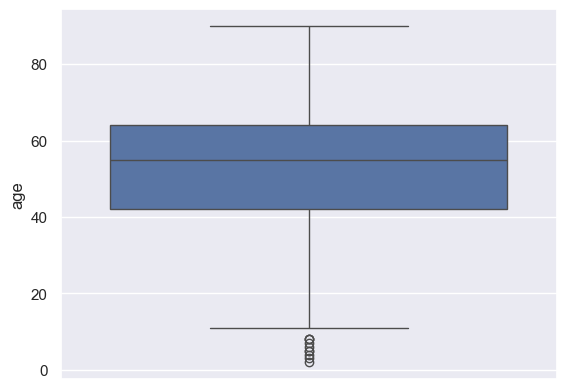

In [118]:
sns.boxplot(y='age', data=df_imp2)

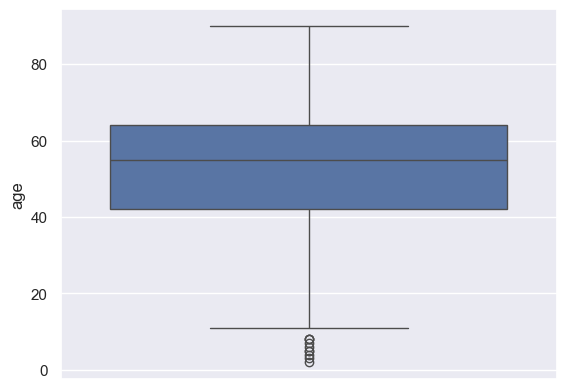

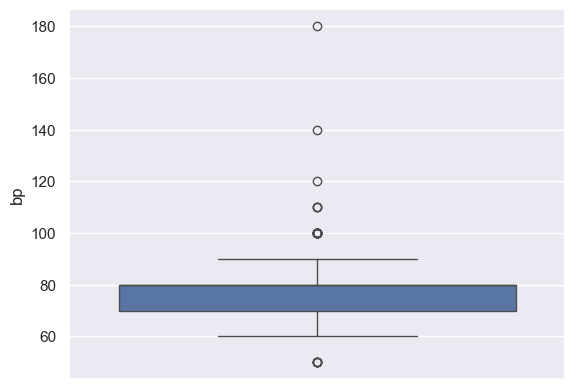

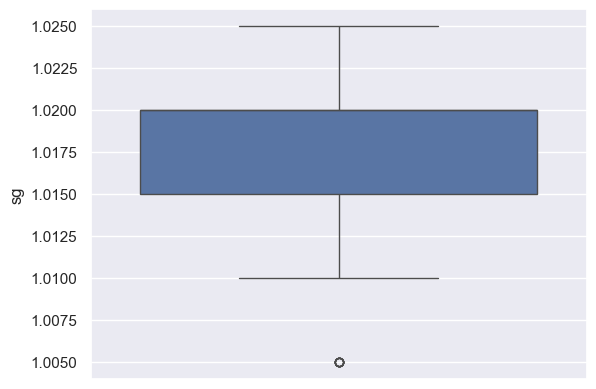

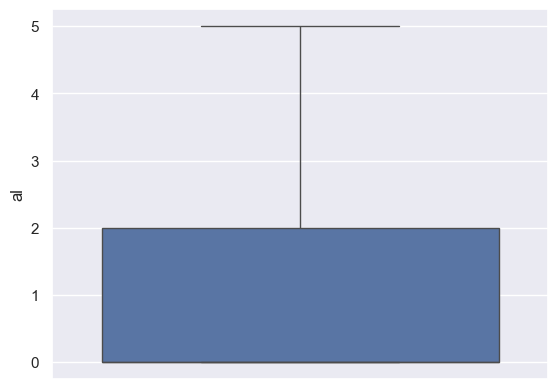

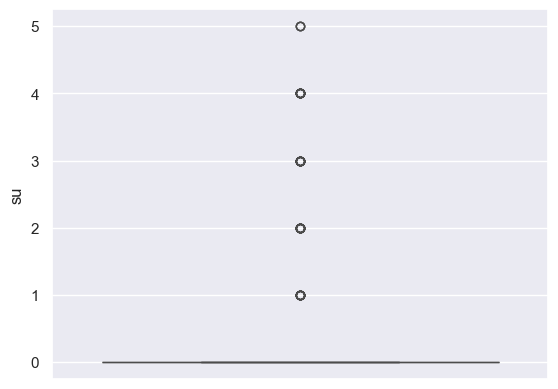

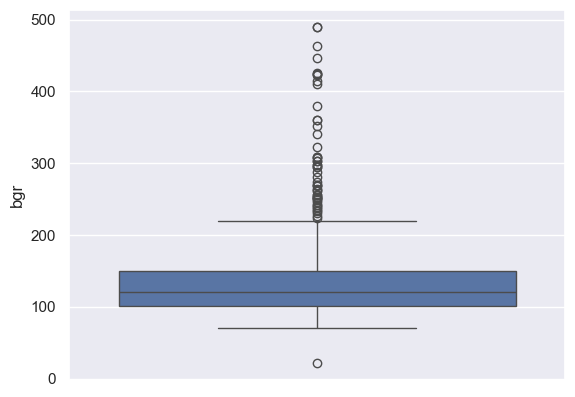

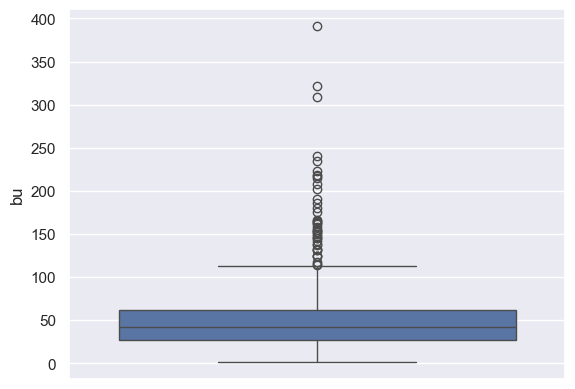

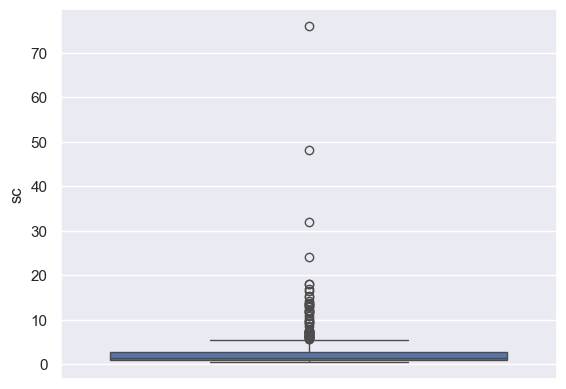

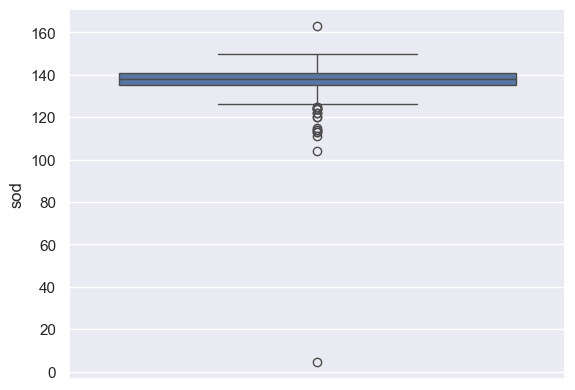

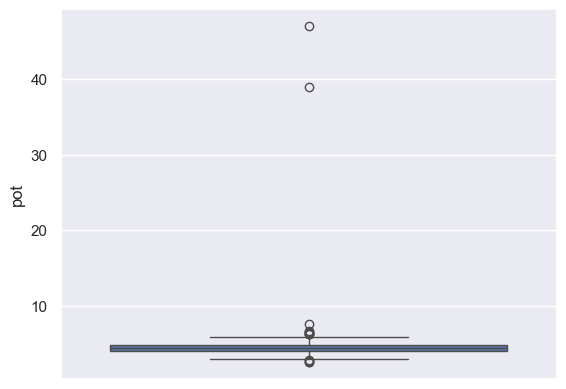

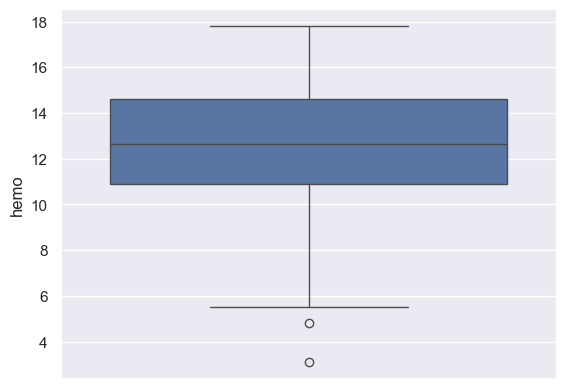

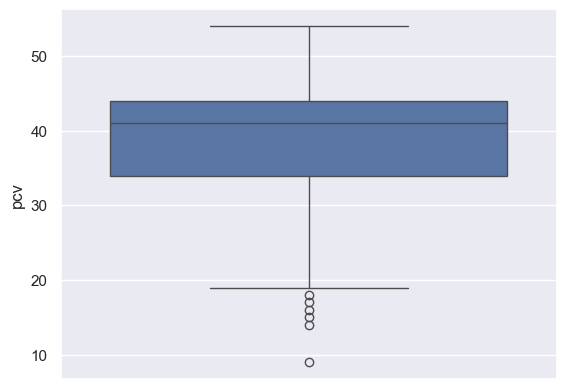

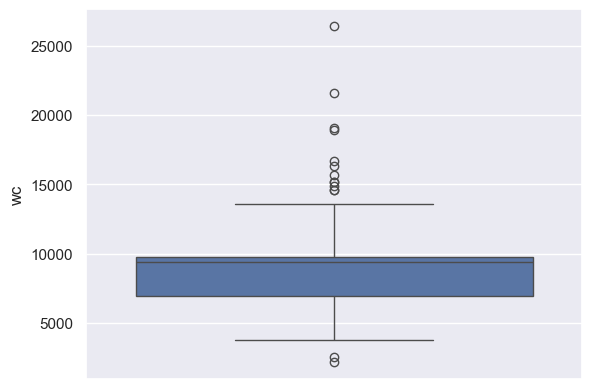

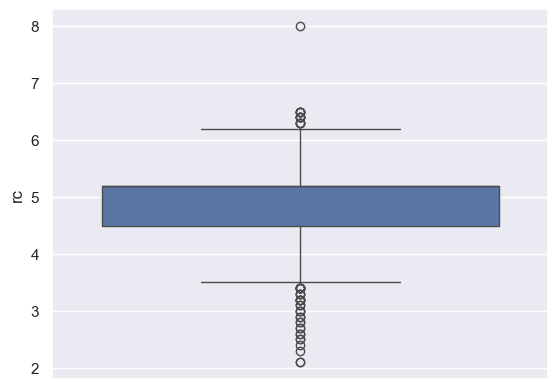

In [114]:
# Checking outlier
def boxplots(col):
    sns.b(df_imp2[col])
    plt.show()

for i in list(df_imp2.select_dtypes(exclude=['object']).columns)[0:]:
    distplots(i)

In [126]:
df_imp1.columns

Index(['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
       'classification', 'test'],
      dtype='object')

In [128]:
df_imp2.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
       'pcv', 'wc', 'rc', 'test'],
      dtype='object')

In [124]:
df_imp1['test'] = 'test'
df_imp2['test'] = 'test'

In [152]:
table_df = pd.concat([df_imp1,df_imp2], axis=1)
table_df

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,...,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,test
0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no,...,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2,test
1,normal,normal,notpresent,notpresent,no,no,no,good,no,no,...,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,5.2,test
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,...,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,5.2,test
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,...,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,test
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,...,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,normal,normal,notpresent,notpresent,no,no,no,good,no,no,...,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,test
396,normal,normal,notpresent,notpresent,no,no,no,good,no,no,...,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,test
397,normal,normal,notpresent,notpresent,no,no,no,good,no,no,...,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,test
398,normal,normal,notpresent,notpresent,no,no,no,good,no,no,...,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,test


In [154]:
table_df.columns

Index(['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
       'classification', 'test', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'test'],
      dtype='object')

In [162]:
table_df = table_df.drop(['test'], axis=1)
table_df.columns

Index(['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
       'classification', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc',
       'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc'],
      dtype='object')

In [164]:
# split the data into independent and dependent variables
x = table_df.drop('classification', axis=1)
y = table_df['classification']

In [166]:
x.columns

Index(['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
       'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
       'pcv', 'wc', 'rc'],
      dtype='object')

In [170]:
y

0         ckd
1         ckd
2         ckd
3         ckd
4         ckd
        ...  
395    notckd
396    notckd
397    notckd
398    notckd
399    notckd
Name: classification, Length: 400, dtype: object

In [172]:
y.value_counts()

classification
ckd       250
notckd    150
Name: count, dtype: int64

In [174]:
y = np.where(y=='ckd', 1,0)

In [180]:
pd.DataFrame(y).value_counts()

1    250
0    150
Name: count, dtype: int64

In [8]:
# Handing encoding concept 
def classify_features(x):
    categorical_features =[]
    non_categorical_features = []
    discreate_features = []
    continous_features = []
    for column in x.columns:
        if x[column].dtype=='object':
            if x[column].nunique() < 3:
                categorical_features.append(column)
            else:
                non_categorical_features.append(column)
        elif x[column].dtype in ['int64','float64']:
            if x[column].nunique() < 100:
                discreate_features.append(column)
            else:
                continous_features.append(column)
    return categorical_features, non_categorical_features, discreate_features, continous_features

In [3]:
categorical, non_categorical, discreate, continous = classify_features(x)

NameError: name 'x' is not defined

In [ ]:
categorical

In [6]:
non_categorical

NameError: name 'non_categorical' is not defined

In [212]:
discreate

['age', 'bp', 'sg', 'al', 'su', 'sc', 'sod', 'pot', 'pcv', 'wc', 'rc']

In [214]:
continous

['bgr', 'bu', 'hemo']

In [216]:
import dtale
dtale.show(df)